train_size 508
508
(508, 384) (508, 6)
data shape (1016, 6) (1016, 384)
data_size 1016 1016


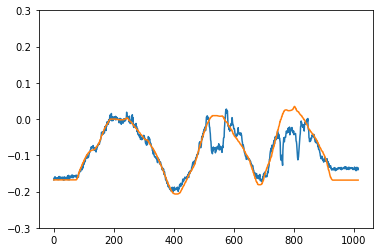

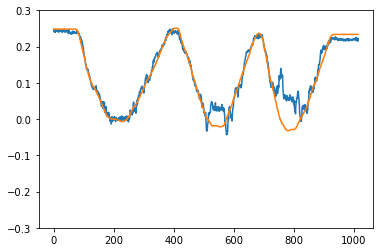

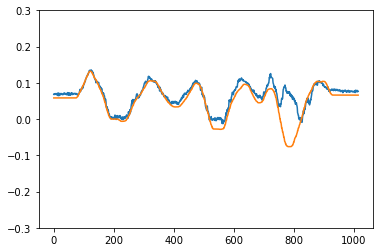

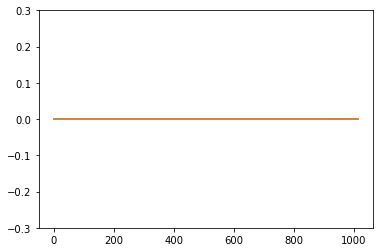

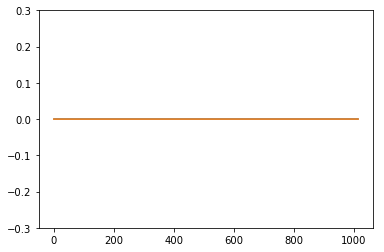

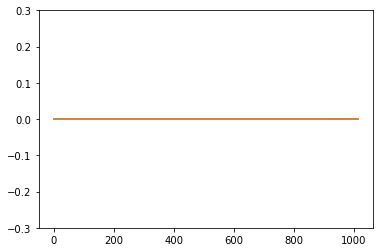

In [23]:
import os, cv2
import matplotlib.pyplot as plt
from regression import *

data_name = '/home/rmqlife/work/data/2017-09-09-11-08-00/data2.npz'

data = np.load(data_name)
pos = data['pos']
feat = data['feat']

prop = 0.5
train_size = int(len(pos)*prop)
print "train_size", train_size

model = load_model_data(pos[:train_size], feat[:train_size], num_samples=2, alpha=100)
print 'data shape', pos.shape,feat.shape
# Use the model to predict the velocity/direction of end effector
target = 200  # target index  
X = feat - feat[target]
y = pos - pos[target]
y_pred = model.predict(X)

print "data_size", len(y), len(y_pred)
for i in range(y_pred.shape[1]):
    axes = plt.gca()
    axes.set_ylim([-0.3,0.3])
    plt.plot(range(y_pred.shape[0]),y_pred[:,i])
    plt.plot(range(y.shape[0]),y[:,i])
    plt.show()

In [ ]:
# Another dataset to fit
data = np.load('/home/rmqlife/work/cloth_hri/scripts/data_0815-1740.npz')
data = np.load('/home/rmqlife/work/cloth_hri/scripts/data_0815-2050.npz')
feat = data['feat']
pos = data['pos']
# Use the model to predict the velocity/direction of end effector
target = 0  # target index  
X = feat[:] - feat[target]
y = pos[:] - pos[target]

X,y = same_size(X,y)

#compute the gradient of the feature vector
y_pred = model.predict(X)



#y_pred = uniform_filter1d(y_pred,30)
for i in range(y_pred.shape[1]):
    axes = plt.gca()
    axes.set_ylim([-0.15,0.15])
    plt.plot(range(y_pred.shape[0]),y_pred[:,i])
    plt.plot(range(len(y)),y[:,i])
    plt.show()